# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


In [17]:
!pip install httplib2 qgrid ipywidgets
!pip install --upgrade google-api-python-client
!pip install --upgrade oauth2client
!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: google-api-python-client in c:\users\johng\anaconda3\lib\site-packages (1.7.4)
Requirement not upgraded as not directly required: google-auth>=1.4.1 in c:\users\johng\anaconda3\lib\site-packages (from google-api-python-client) (1.5.1)
Requirement not upgraded as not directly required: uritemplate<4dev,>=3.0.0 in c:\users\johng\anaconda3\lib\site-packages (from google-api-python-client) (3.0.0)
Requirement not upgraded as not directly required: six<2dev,>=1.6.1 in c:\users\johng\anaconda3\lib\site-packages (from google-api-python-client) (1.11.0)
Requirement not upgraded as not directly required: httplib2<1dev,>=0.9.2 in c:\users\johng\anaconda3\lib\site-packages (from google-api-python-client) (0.11.3)
Requirement not upgraded as not directly required: google-auth-httplib2>=0.0.3 in c:\users\johng\anaconda3\lib\site-packages (from google-api-python-client) (0.0.3)
Requirement not upgraded as not directly required: cachetools>=2.0.0 in c:\users\johng\anac

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: oauth2client in c:\users\johng\anaconda3\lib\site-packages (4.1.2)
Requirement not upgraded as not directly required: httplib2>=0.9.1 in c:\users\johng\anaconda3\lib\site-packages (from oauth2client) (0.11.3)
Requirement not upgraded as not directly required: six>=1.6.1 in c:\users\johng\anaconda3\lib\site-packages (from oauth2client) (1.11.0)
Requirement not upgraded as not directly required: pyasn1-modules>=0.0.5 in c:\users\johng\anaconda3\lib\site-packages (from oauth2client) (0.2.2)
Requirement not upgraded as not directly required: pyasn1>=0.1.7 in c:\users\johng\anaconda3\lib\site-packages (from oauth2client) (0.4.4)
Requirement not upgraded as not directly required: rsa>=3.1.4 in c:\users\johng\anaconda3\lib\site-packages (from oauth2client) (3.4.2)


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: google-auth in c:\users\johng\anaconda3\lib\site-packages (1.5.1)
Requirement already up-to-date: google-auth-oauthlib in c:\users\johng\anaconda3\lib\site-packages (0.2.0)
Requirement already up-to-date: google-auth-httplib2 in c:\users\johng\anaconda3\lib\site-packages (0.0.3)
Requirement not upgraded as not directly required: pyasn1-modules>=0.2.1 in c:\users\johng\anaconda3\lib\site-packages (from google-auth) (0.2.2)
Requirement not upgraded as not directly required: six>=1.9.0 in c:\users\johng\anaconda3\lib\site-packages (from google-auth) (1.11.0)
Requirement not upgraded as not directly required: cachetools>=2.0.0 in c:\users\johng\anaconda3\lib\site-packages (from google-auth) (2.1.0)
Requirement not upgraded as not directly required: rsa>=3.1.4 in c:\users\johng\anaconda3\lib\site-packages (from google-auth) (3.4.2)
Requirement not upgraded as not directly required: requests-oauthlib>=0.7.0 in c:\users\johng\anaconda3\lib\site-packages (from g

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
!jupyter nbextension enable --py --sys-prefix qgrid
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension qgrid/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [19]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

Haga click en el siguiente enlace para autenticarse con su cuenta de correo institucional
https://accounts.google.com/o/oauth2/auth?client_id=893762525034-g9d91ddls9e19a1q77c7hsq2rhgqo9h7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile+email&access_type=offline&response_type=code
waiting for authentication ...
authentication succeeded
/?code=4/NADMutQT2ReC0-zQsb-cL1_eF07CIDstLq-p6X9dg8AQ6XdC57AnPHF1T17cNfu5LFpAk9w9rq9CnFcOiwYrzhk


C:\Users\johng\Anaconda3\lib\site-packages\oauth2client\_helpers.py:133: ResourceWarning: unclosed <ssl.SSLSocket fd=2040, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.0.19', 50184), raddr=('172.217.28.109', 443)>
  return wrapped(*args, **kwargs)


,johna.galeano@udea.edu.coJOHN ALEXÁNDER GALEANO OSPINAgoogle id: 111882263615850761169


#### Segundo integrante: Sidney Paola Aguirre Castro

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

El problema de regresión que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos, consulte: https://archive.ics.uci.edu/ml/datasets/Air+Quality). Ejecute la siguiente celda para cargar los datos.

In [3]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
#la descripción de la base de datos y la contextualización del problema.
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

X = db[:,0:12]
Y = db[:,12]

#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




1.2 Cuántas caracteristicas tiene el problema?: 




<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

In [4]:
muestras=np.size(X,0)
caracteristicas=np.size(X,1)

print('la cantidad de muestas son: ' + str(muestras))
print('la cantidad de caracteristicas son: '+ str(caracteristicas))

la cantidad de muestas son: 9357
la cantidad de caracteristicas son: 12


## Ejercicio 2

Analice los siguientes métodos a la luz de la teoría vista para los modelos de regresión polinomial múltiple. Una vez comprenda su funcionamiento, proceda a completar el código del método de gradiente descendente para el problema de regresión. En este método se le pide escribir el código de la regla de actualización de los parámetros del algorítmo de gradiente descedente: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

y además se pide graficar el error cuadrático 
medio (ECM) vs. las iteraciones del algorítmo. La gráfica debe llevar título y los correspondientes nombres de los ejes.

In [5]:
from __future__ import division
#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


#Potencia de polinomio
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

    
#Gradiente descendente para regresión lineal múltiple
def gradiente_descendente(X,Y,eta):
     
    #X es la matriz de datos extendida. W es el vector de parámetros del modelo
    #Extendemos la matriz
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    print('Numero de variables - d: ',d)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    print('Numero de muestras - N: ',N)
    
    #Inicializamos el vector de parámetros aleatoriamente
    
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    
    for iter in range(iteraciones):
        error = ECM(regression(X,W),Y)
        ecms[iter] = error
        #Aquí debe completar el código con la regla de actualización de los parámetros W. Tenga en cuenta
        #los nombres de las variables ya creadas: W, X, Y
        for j in range(d):
            sum = 0
            for i in range(N):
                sum += ((np.dot(X[i,:],W)-Y[i]) * X[i,j])
            W[j] = W[j] - ((eta/N) * sum)
       
        
    #print 'Vector de parámetros del modelo:\n'
    #print W
    #print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    plt.title('EMC Vs Iteraciones')
    plt.ylabel('emc')
    plt.xlabel('iteraciones')
    plt.ylim(0,1000)
    plt.xlim(0,600)
    plt.ion()
    plt.plot(np.linspace(0,iteraciones,iteraciones),ecms)
    plt.show()
    
    return W
    

## Ejercicio 3

En este punto debe hacer uso de los métodos escritos en el punto anterior para realizar el proceso de modelamiento y simulación de los datos de cargados en el punto 1. Complete el código llamando a la función gradiente_descendente y pasandole los parámetros correspondientes. Debe obtener como salída el vector de parámetros W estimado y la gráfica del error cuadrático medio vs iteraciones.

Numero de variables - d:  13
Numero de muestras - N:  6550


C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in add
C:\Users\johng\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in add



Error Final durante el entrenamiento = nan


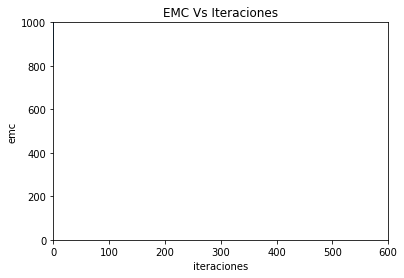


Error durante la prueba = nan


In [7]:
from numpy import random
import math
N = np.size(X,0)

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 1
X2 = potenciaPolinomio(X,grado)

#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
ind=np.random.permutation(N)
Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

#Normalizamos los datos
media = np.mean(Xtrain)
desvia = np.std(Xtrain)
#Xtrain = stats.stats.zscore(Xtrain)
#Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

eta = 1e-1

#Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
W = gradiente_descendente(Xtrain,Ytrain,eta)

#Evaluamos las predicciones del modelo con los datos de test
unos = np.array([np.ones(np.size(Xtest,0))])
Xtest = np.concatenate((unos.T, Xtest), axis=1)
Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
Yest = regression(Xtest, W)
Error = ECM(Yest,Ytest)
print ('\nError durante la prueba = ' + str(Error))

In [50]:
print(np.shape(Xtrain))
print(np.shape(Ytrain))


(6550, 12)
(6550,)


In [51]:
print(np.shape(Xtest))
print(np.shape(Ytest))

(2807, 12)
(2807,)


#### Responda:

3.1 Cuál es el número de coeficientes w que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:
R: El número de coeficientes w que se obtienen al ingresar un polinomio de grado 4 son 49, porque la funci&oacute;n que obtiene el polinomio de grado 4 toma las caracter&iacute;sticas de X y va agregando a la matriz los valores cuando est&aacute;n elevados a la uno, mas los elevados al cuadrado, mas los elevados al cubo, y los elevados a la cuatro, lo que suma 48 coeficientes, adem&aacute;s del t&eacute;rmino independiente, son 49.


3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?:
R:Si el grado es i (diferente de 1, si el grado es igual a uno (1) no se cambia la matrix X), el  par de columnas que se adjunta es uno aquel donde las muestras se elevan a la i (^i) pero esto se opera elemento a elemento. pero en la linea (Xadd = X**i) donde se elevan las muestras, estas muestras no se hacen elemento a elemento, puesto que se está tomando el arreglo X y lo eleva al cuadrado.

## Ejercicio 4

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


In [6]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["ECM_Entrenamiento"][0] = "774.055"
df_types["ECM_Prueba"][0] = "703.376"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:21

C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:21

C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\johng\Anaconda3\lib\importlib\_bootstrap.py:21

ModuleNotFoundError: No module named 'qgrid'

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [106]:
qgrid_widget.get_changed_df()

ECM_Entrenamiento ECM_Prueba
Tasa de aprendizaje Grado del polinomio                             
1e-5                1                             774.055    703.376
                    2                             748.188    709.881
                    3                             724.993    709.847
                    4                             703.416    711.370
                    5                             682.854    711.402
1e-3                1                              47.410    432.362
                    2                              19.415    666.854
                    3                              13.542    715.087
                    4                              11.354    716.556
                    5                              10.490    711.366
1e-1                1                                               
                    2                                               
                    3                                               
                    4                                               
                    5

Nota: Durante el llenado de la tabla nos presento un problema en el apartado de la tasa de aprendizaje 1e-1 con grados 
desde 1 hasta el 5, por lo cual creamos otra Celda debajo de la tabla, y colocamos los resultados en este celda.

In [ ]:
1e-1:
    eta = 1: Entrenamiento: 0.923     Prueba: 1337.748
    eta = 2: Entrenamiento: 0.110     Prueba: 845.319
    eta = 3: Entrenamiento: 0.047     Prueba: 685.336
    eta = 4: Entrenamiento: 0.024     Prueba: 674.363
    eta = 5: Entrenamiento: 0.028     Prueba: 679.195

## Ejercicio 4

En la celda de código del ejercicio 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferntes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

4.1 Qué sucede con los valores del ECM?
R: No se puede calcular(NaN) 

4.2 A qué se debe lo que observa?
R:una regresión sin una estandarizan de sus variables, dará muestras tan dispersas y sin relación entre sus datos que no se pueden cuantificar.

4.3 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n log&iacute;stica y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?
R: 
Normalizaci&oacute;n sobre los datos lo que hace es que datos que se miden en escalas diferentes, sean ajustados en una escala com&uacute;n. La normalizaci&oacute;n es necesaria en el modelo de regresi&oacute;n log&iacute;stica porque permite realizar comparaciones entre datos medidos en escalas diferentes y que aparentemente son muy dispares, pero tienen relaci&oacute;n en la informaci&oacute;n que estemos analizando. 

Los tipos de normalizaci&oacute;n m&aacute;s comunes son: Desviaci&oacute;n Est&aacute;ndar, T de student, Residuo estudentizado, y Coeficiente de Variaci&oacute;n.

El m&eacute;todo utilizado en el laboratorio para normalizar los datos fue la Desviaci&oacute;n Est&aacute;ndar, la cual se logra con la funci&oacute;n np.std().